# Pneumonia Detection

I am segregating the images in my PNEUMONIA folder into two seperate folders one for Bacterial Pneumonia and one for Viral Pneumonia. Will do it in all folders (test, train and val)

In [1]:
import os
import shutil

# define the input folder path
input_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\train\\PNEUMONIA"

# define the output folder paths
bacteria_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\train\\BACTERIAL PNEUMONIA"
virus_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\train\\VIRAL PNEUMONIA"

# create the output folders if they don't exist
os.makedirs(bacteria_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# loop through all the files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename contains "bacteria" or "virus"
    if "bacteria" in filename.lower():
        # move the file to the bacteria folder
        shutil.move(os.path.join(input_folder, filename), bacteria_folder)
    elif "virus" in filename.lower():
        # move the file to the virus folder
        shutil.move(os.path.join(input_folder, filename), virus_folder)


Error: Destination path 'C:\Users\Divyam\Desktop\Pneumonia Detection\chest_xray\train\BACTERIAL PNEUMONIA\person1000_bacteria_2931.jpeg' already exists

In [2]:
import os
import shutil

# define the input folder path
input_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\test\\PNEUMONIA"

# define the output folder paths
bacteria_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\test\\BACTERIAL PNEUMONIA"
virus_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\test\\VIRAL PNEUMONIA"

# create the output folders if they don't exist
os.makedirs(bacteria_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# loop through all the files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename contains "bacteria" or "virus"
    if "bacteria" in filename.lower():
        # move the file to the bacteria folder
        shutil.move(os.path.join(input_folder, filename), bacteria_folder)
    elif "virus" in filename.lower():
        # move the file to the virus folder
        shutil.move(os.path.join(input_folder, filename), virus_folder)


Error: Destination path 'C:\Users\Divyam\Desktop\Pneumonia Detection\chest_xray\test\BACTERIAL PNEUMONIA\person100_bacteria_475.jpeg' already exists

In [3]:
import os
import shutil

# define the input folder path
input_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\val\\PNEUMONIA"

# define the output folder paths
bacteria_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\val\\BACTERIAL PNEUMONIA"
virus_folder = "C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\val\\VIRAL PNEUMONIA"

# create the output folders if they don't exist
os.makedirs(bacteria_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# loop through all the files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename contains "bacteria" or "virus"
    if "bacteria" in filename.lower():
        # move the file to the bacteria folder
        shutil.move(os.path.join(input_folder, filename), bacteria_folder)
    elif "virus" in filename.lower():
        # move the file to the virus folder
        shutil.move(os.path.join(input_folder, filename), virus_folder)


Error: Destination path 'C:\Users\Divyam\Desktop\Pneumonia Detection\chest_xray\val\BACTERIAL PNEUMONIA\person1946_bacteria_4874.jpeg' already exists

# TRAINING THE AI MODEL

In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Define the data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # use 20% of the data for validation

train_dir = 'C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\train'

num_classes = 3

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training', # use the training subset of the data
    classes=['NORMAL', 'PNEUMONIA_BACTERIA', 'PNEUMONIA_VIRUS'])

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation', # use the validation subset of the data
    classes=['NORMAL', 'PNEUMONIA_BACTERIA', 'PNEUMONIA_VIRUS'])

# Load the pre-trained VGG16 model, excluding the top layer
vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all the layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Add custom top layers for our classification task
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

# Combine the pre-trained model and our custom top layers
model = Model(inputs=vgg_model.input, outputs=x)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=int(validation_generator.samples/validation_generator.batch_size))

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = 'C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray\\test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['NORMAL', 'PNEUMONIA_BACTERIA', 'PNEUMONIA_VIRUS'])

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print('Test accuracy:', test_acc)

# Save the model for future use
model.save('xray_classification_model.h5')


# TEST

In [ ]:
Testing on a single image

In [53]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(3, activation='softmax')
])

# Load the image
#test.jpeg was bacterial
img = cv2.imread('C:\\Users\\Divyam\\Desktop\\AI Project\\Test Dataset\\PNEUMONIA\\person32_virus_71.jpeg')

# Check if img is None
if img is None:
    print('Failed to load image')
else:
    # Resize the image to 224x224 pixels
    img = cv2.resize(img, (224, 224))

    # Rescale the pixel values to [0, 1]
    img = img / 255.0

    # Add a batch dimension to the image
    img = np.expand_dims(img, axis=0)

    # Predict the class label using the trained model
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions, axis=1)[0]

    # Map the predicted label to the corresponding class name
    class_names = ['NORMAL', 'PNEUMONIA_VIRUS', 'PNEUMONIA_BACTERIA']
    predicted_class_name = class_names[predicted_label]

    # Print the predicted class name
    print('The predicted class label for the image is:', predicted_class_name)


1/1 [==============================] - 0s 81ms/step
The predicted class label for the image is: PNEUMONIA_BACTERIA


Testing on Multiple images and printing accuracy

AttributeError: 'XRayClassificationModel' object has no attribute 'predict'

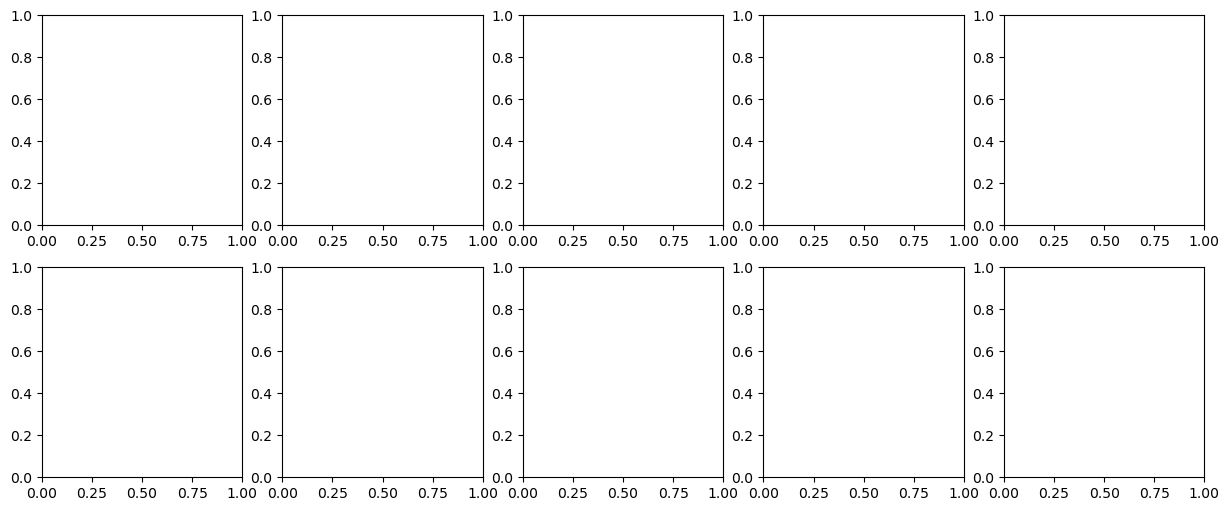

In [74]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the class names
class_names = ['NORMAL', 'PNEUMONIA_VIRUS', 'PNEUMONIA_BACTERIA']

# Set up the figure for visualization
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Get a list of 10 random image filenames from the test folder
test_dir = 'C:\\Users\\Divyam\\Desktop\\Pneumonia Detection\\chest_xray'
img_filenames = np.random.choice(os.listdir(test_dir), size=10, replace=False)

# Iterate over the image filenames and visualize the results
for i, img_filename in enumerate(img_filenames):
    # Load the image
    img_path = os.path.join(test_dir, img_filename)
    img = cv2.imread(img_path)

    # Resize the image to 224x224 pixels
    img = cv2.resize(img, (224, 224))

    # Rescale the pixel values to [0, 1]
    img = img / 255.0

    # Add a batch dimension to the image
    img = np.expand_dims(img, axis=0)

    # Predict the class label using the trained model
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_label]

    # Get the actual class name from the image filename
    actual_class_name = img_filename.split('_')[1].upper()

    # Determine the color for visualization
    color = 'green' if predicted_class_name == actual_class_name else 'red'

    # Visualize the image and the predicted class label
    axs[i].imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    axs[i].set_title('Actual: {}\nPredicted: {}'.format(actual_class_name, predicted_class_name), color=color)
    axs[i].axis('off')

plt.tight_layout()
plt.show()
